## 3. Análise Exploratória dos Dados (EDA) Tratados  
📒 `2.1-rc-eda-cleaned.ipynb`

**Objetivo:** Explorar os dados tratados por meio de estatísticas descritivas e visualizações gráficas para identificar padrões, tendências e possíveis relações entre variáveis.

📊 **Atividades:**
- Relação entre Variáveis Númericas (scatterplots, heatmap)
- Relação entre Variáveis Categóricas e o Alvo (`price`)
- Insights Relevantes
- Next Steps


In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import sys
from _utils import classificar_correlacao
from scipy.stats import normaltest, pearsonr


sys.path.append("../src")  # adiciona o caminho da pasta src

# Setup para mostrar todas as colunas do dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Desabilita mensagens de FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [255]:
file_path = "../data/processed/car_price_cleaned.csv"
df = pd.read_csv(file_path)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,risk_classification,price-binned,avg-fuel-consumption-kmpl
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,high,medium,10.2
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,high,medium,10.2
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,moderate,medium,9.6
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,high,medium,11.5
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,high,medium,8.5


#### Variável Alvo `price`

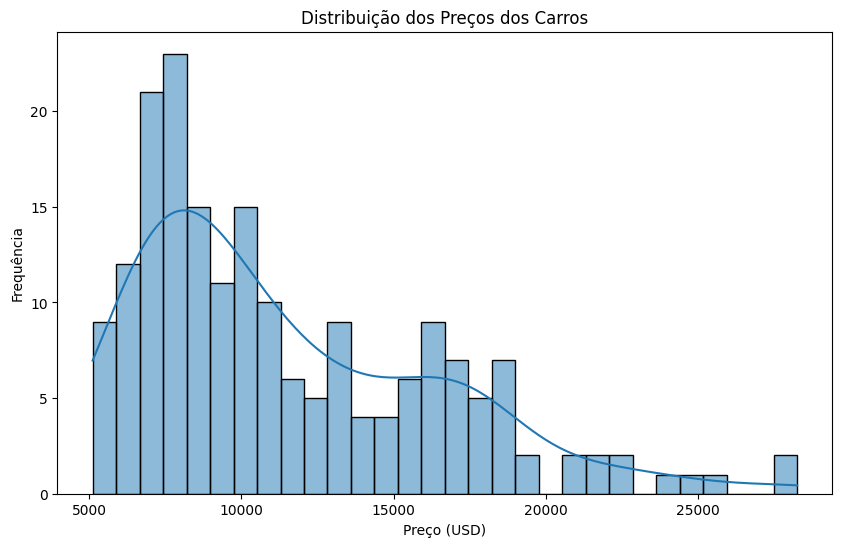

Moda: 10295
Mediana: 9988.0
Media: 11477.874345549739
Distribuição Assimetrica á Direita: moda < media < mediana 


In [256]:
# Análise da distribuição da variável target (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribuição dos Preços dos Carros')
plt.xlabel('Preço (USD)')
plt.ylabel('Frequência')
plt.show()

print("Moda:", df['price'].mode()[0])
print("Mediana:", df['price'].median())
print("Media:", df['price'].mean())
print("Distribuição Assimetrica á Direita: moda < media < mediana ")

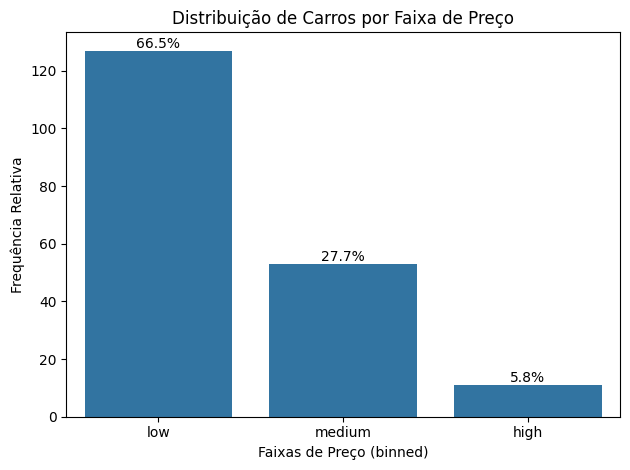

In [257]:
# Contagem absoluta e percentual
price_counts = df['price-binned'].value_counts(normalize=False)
price_percents = df['price-binned'].value_counts(normalize=True) * 100

# Cria o gráfico
ax = sns.barplot(x=price_counts.index, y=price_counts.values)

# Adiciona os labels percentuais nas barras
for i, (count, percent) in enumerate(zip(price_counts.values, price_percents.values)):
    ax.text(i, count + 1, f'{percent:.1f}%', ha='center')

# Rótulos e layout
ax.set_xlabel('Faixas de Preço (binned)')
ax.set_ylabel('Frequência Relativa')
ax.set_title('Distribuição de Carros por Faixa de Preço')

plt.tight_layout()
# Desejo contabilizar o value_counts do `price-binned`

C:\Users\reyna\AppData\Local\Temp\ipykernel_34680\429405639.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


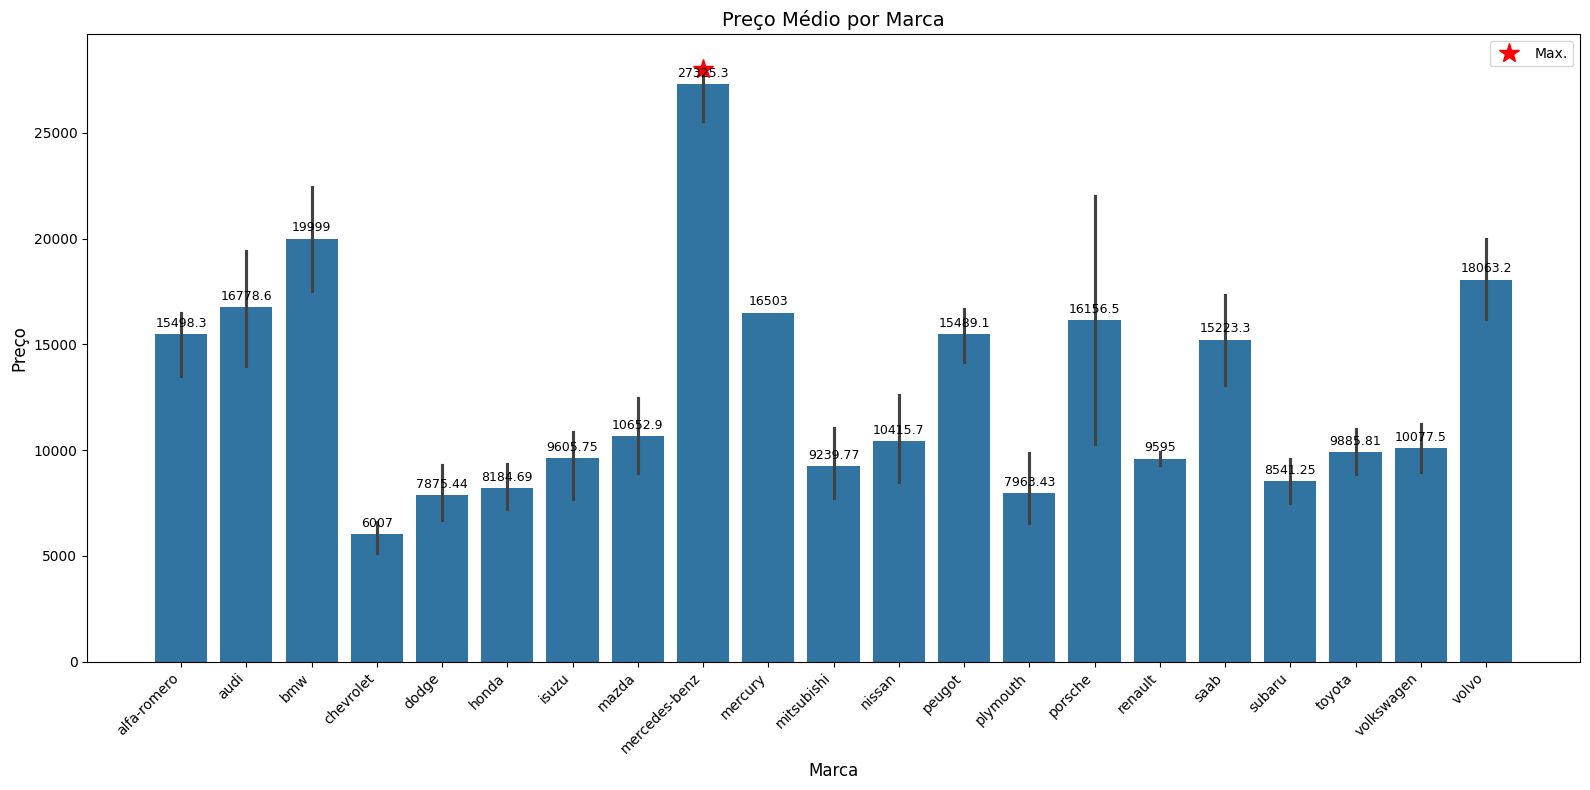

In [258]:
fig, ax = plt.subplots(figsize=(16, 8)) 

sns.barplot(data=df, x='make', y='price', estimator='mean', ax=ax, errorbar='ci')
ax.bar_label(ax.containers[0], fontsize=9, padding=3)
ax.plot('mercedes-benz', 28000, "*", markersize=10, color="r")

# Ajuste para melhorar a leitura dos rótulos no eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Títulos
ax.set_title('Preço Médio por Marca', fontsize=14)
ax.set_xlabel('Marca', fontsize=12)
ax.set_ylabel('Preço', fontsize=12)

# Destaca um ponto específico no gráfico
ax.plot(
    df['make'].unique().tolist().index('mercedes-benz'), 28000,
    "*", markersize=15, color="red", label='Max.'
)

ax.legend()
plt.tight_layout()
plt.savefig('../reports/figures/eda_barplot_price_per_make')

In [259]:
# Listar Veículos classificados como Preço Alto
df_high_price_class = df[df['price-binned'] == 'high']
df_high_price_class

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,risk_classification,price-binned,avg-fuel-consumption-kmpl
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875,moderate,high,7.9
12,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970,moderate,high,10.4
13,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2765,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105,moderate,high,10.4
14,1,115,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565,moderate,high,9.6
61,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,25552,moderate,high,10.0
62,-1,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,58.7,3750,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28248,moderate,high,10.0
63,0,93,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28176,moderate,high,10.0
114,3,186,porsche,gas,std,two,hatchback,rwd,front,94.5,168.9,68.3,50.2,2778,ohc,four,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018,high,high,9.8
188,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,moderate,high,8.7
189,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470,moderate,high,11.3


#### Variáveis Numéricas

**Insights esperados**:
- Quais são as caracteristicas númericas que existe correlação significativa com o alvo `price`? Qual a força dessa correlação? Qual a relação linear?
- Estas caracteristicas estão relacionadas á alguma caracteristica do perfil do mercado avaliado? Se Sim, quais?

In [260]:
# Deletar as colunas de `city-mpg` e `highway-mpg`,  em virtude da variável derivada que foi criada de consumo médio `avg-fuel-consumption`
# Deletar `symboling` variável categórica classificada por 'risk-classification'  
df.drop(['city-mpg', 'highway-mpg', 'symboling'], axis=1, inplace=True)

# Seleciona as variáveis numéricas
features_numeric = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

In [261]:
# Estatistica Descritiva
df.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,avg-fuel-consumption-kmpl
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,120.827225,98.276963,172.826702,65.670157,53.738220,2484.670157,118.858639,3.306492,3.251257,10.182827,98.282723,5128.795812,11477.874346,12.212042
std,32.782320,5.267057,11.347755,1.902242,2.430693,449.312412,27.473929,0.264992,0.303469,4.005299,33.147099,472.572039,4929.765412,2.682342
min,65.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,5118.000000,7.900000
25%,96.500000,94.500000,166.300000,64.000000,52.000000,2128.000000,97.000000,3.130000,3.115000,8.700000,70.000000,4800.000000,7713.500000,10.000000
50%,115.000000,96.500000,172.600000,65.400000,54.100000,2395.000000,110.000000,3.270000,3.290000,9.000000,94.000000,5200.000000,9988.000000,11.900000
75%,141.000000,100.400000,178.300000,66.500000,55.500000,2828.500000,136.000000,3.540000,3.410000,9.400000,114.000000,5500.000000,14954.500000,14.350000
max,256.000000,114.200000,198.900000,72.300000,59.800000,3750.000000,203.000000,3.940000,3.900000,23.000000,288.000000,6600.000000,28248.000000,21.900000


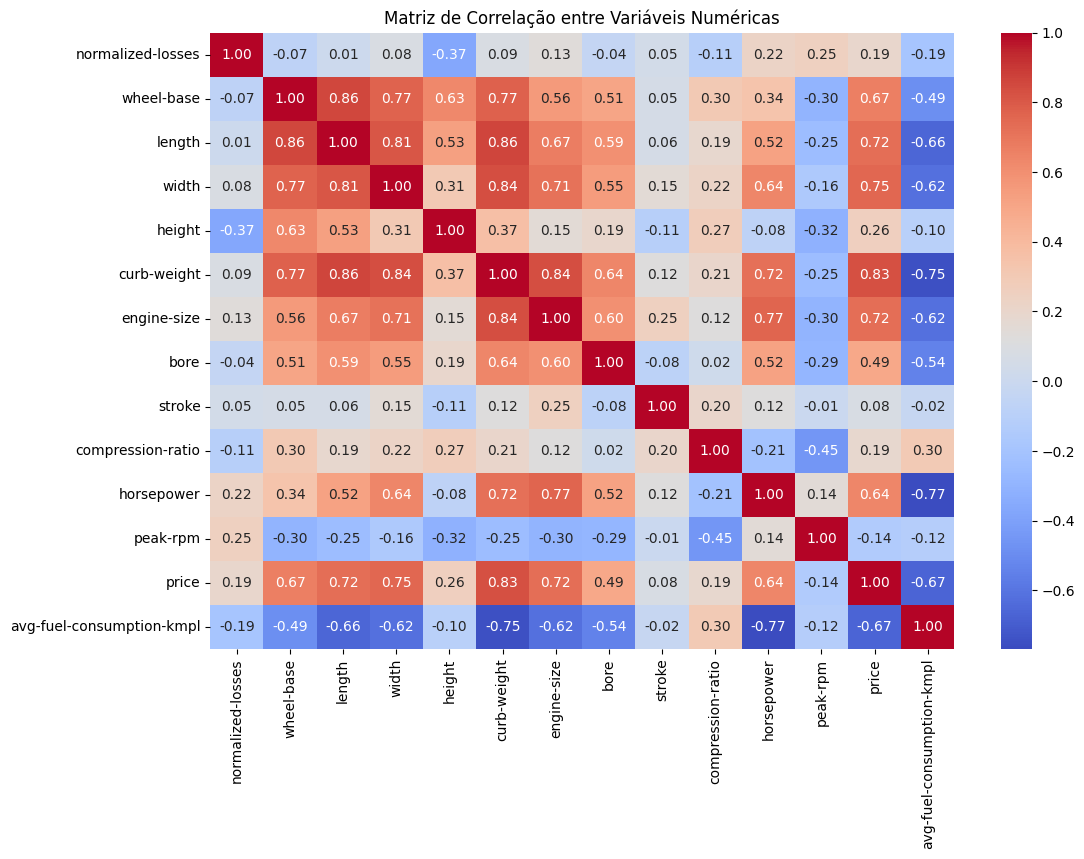

In [262]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(df[features_numeric].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.savefig('../reports/figures/eda_heatmap_correlation')



Selecionar as variáveis preditoras que possuem correlação forte ou muito forte com a variável alvo `price`. Aqui o objetivo é verificar se existe correlação e qual a a sua força e se a relação é linear positiva ou negativa.

**NOTA:** Considerar o nível de confiança alpha=0.05 (para um intervalo de 95% de confiança)

- i) **p-value(p):** verifica se existe ou não correlação dentro de um intervalo de confiança de 95%
    - P-value >= 0.05    Ho = ***Falha em rejeitar H₀ - não há correlação significativa***
    - P-value <  0.05    Ha = ***Rejeita H₀ - há diferença ou correlação significativa***
- ii) **pearson_correlation(r):** medir a força da correlação, sendo que (+) a correlação é positiva, (-) a correlação é negativa.

| Valor de r (+ ou -) | Interpretação           |
|---------------------|-------------------------|
| 0.00 a 0.19         | correlação muito fraca  |
| 0.20 a 0.39         | correlação fraca        |
| 0.40 a 0.69         | correlação moderada     |
| 0.70 a 0.89         | correlação forte        |
| 0.90 a 1.00         | correlação muito forte  |

Fonte: SHIMAKURA, Silvia Emiko. Interpretação do coeficiente de correlação. LEG, UFPR,. 2006.

In [263]:
# Seleciona as variáveis preditoras com forte correlação r > 0.70
#pearson_coef, p_value = pearsonr(df['length'], df['price'])

numeric_feature_corr_list = ['curb-weight','length','width','engine-size','avg-fuel-consumption-kmpl','horsepower', 'price'] 

df_corr = df[numeric_feature_corr_list]

for col in numeric_feature_corr_list:
    result = classificar_correlacao(x=df_corr[col], y=df['price'])
    print(f"{col} : {result}\n")

# NOTA: # `avg-fuel-consumption` e `horsepower` foram classificados como correlação  moderada, ambos obtiveram seu valor de "r" igual a 0.67 e 0.64 respectivamente. 
# entretanto o cliente pediu que considerasse estas duas variáveis de acordo com sua experiência de mercado, com isto consideramos com ~0.7 (forte)

curb-weight : {'correlacao': np.float64(0.8329579461387322), 'p_valor': np.float64(1.8469932605939318e-50), 'classificacao': 'Uma correlação forte'}

length : {'correlacao': np.float64(0.7248540797477706), 'p_valor': np.float64(2.0542940625449698e-32), 'classificacao': 'Uma correlação forte'}

width : {'correlacao': np.float64(0.7528080340607874), 'p_valor': np.float64(3.625531520243547e-36), 'classificacao': 'Uma correlação forte'}

engine-size : {'correlacao': np.float64(0.7242024604397928), 'p_valor': np.float64(2.480955270624188e-32), 'classificacao': 'Uma correlação forte'}

avg-fuel-consumption-kmpl : {'correlacao': np.float64(-0.6653440208415172), 'p_valor': np.float64(8.789457382754789e-26), 'classificacao': 'Uma correlação moderada'}

horsepower : {'correlacao': np.float64(0.639391229035334), 'p_valor': np.float64(2.4075465770924173e-23), 'classificacao': 'Uma correlação moderada'}

price : {'correlacao': np.float64(1.0), 'p_valor': np.float64(0.0), 'classificacao': 'Uma corre

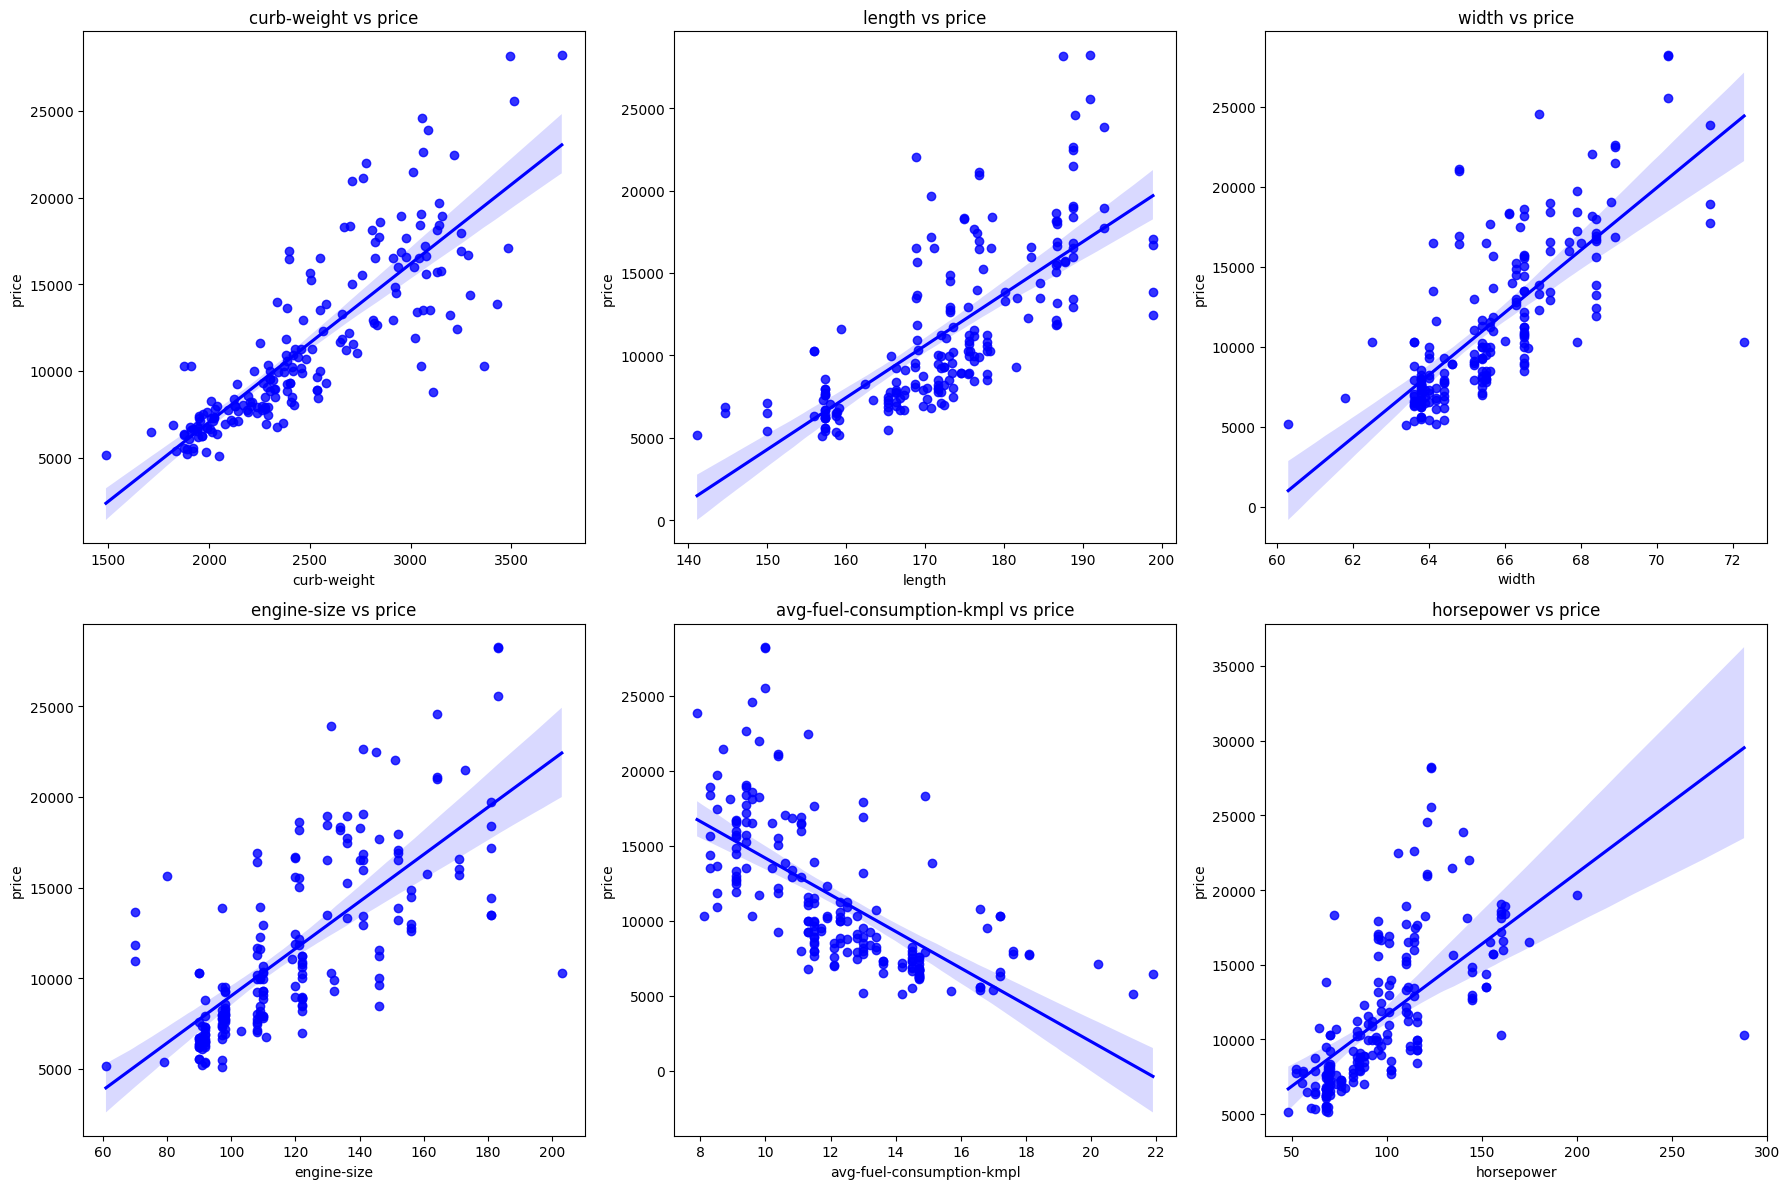

In [264]:
# Criando uma matriz de gráficos de regressão (scatter com linha de regressão)
num_cols = 3
num_rows = int(np.ceil(len(numeric_feature_corr_list[:-1]) / num_cols))  # Exclui 'price' como y

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))

for i, feature in enumerate(numeric_feature_corr_list[:-1]):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.regplot(x=feature, y='price', data=df_corr, color='blue', ax=ax)
    ax.set_title(f'{feature} vs price')

# Esconde eixos vazios, se houver
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout()
fig.savefig('../reports/figures/eda_scatterplot_correlation')

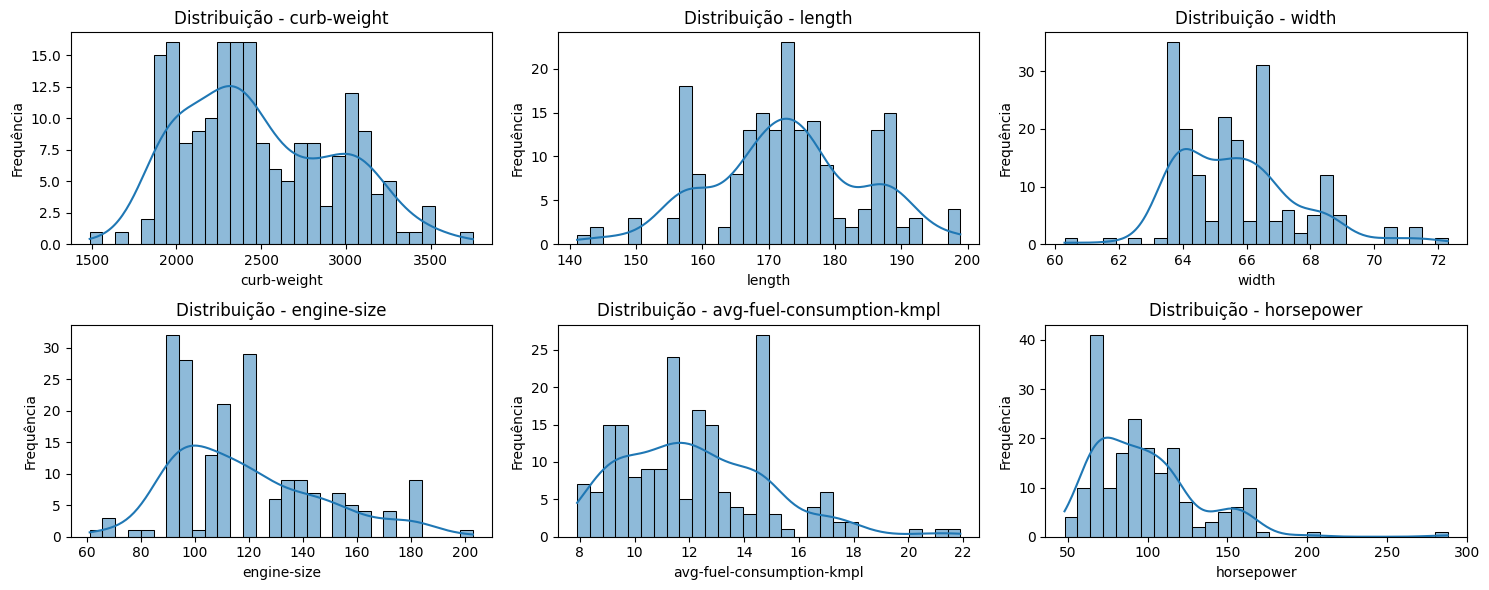

In [265]:
# Histograma para distribuição (em matriz de subplots)

n = len(numeric_feature_corr_list[:-1]) #exclui a última posição `price`
cols = 3  # número de colunas da matriz de gráficos
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*3))
axes = axes.flatten()

for i, col in enumerate(numeric_feature_corr_list[:-1]):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribuição - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Remove eixos extras se houver
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
fig.savefig('../reports/figures/eda_hist_numerical')
plt.show()

#### 📌 INSIGHT REVISADO:

- Das 13 variáveis numéricas analisadas, 6 apresentaram coeficiente de correlação de Pearson com |r| ≥ 0.70, sendo classificadas como de ***correlação forte ou muito forte*** com a variável `price`.
- Todas as 6 variáveis dizem respeito a características técnicas do veículo, sendo:
  - **Chassi:** `curb-weight`, `length`, `width`
  - **Powertrain:** `engine-size`, `horsepower`, `avg-fuel-consumption-kmpl`
- A variável `avg-fuel-consumption-kmpl` apresentou **correlação negativa com o preço**, sugerindo que ***veículos mais caros tendem a ser menos econômicos*** (fazem menos km por litro), o que pode refletir em um perfil de mercado com interesse maior em carros mais potentes e maiores.
- Este padrão reforça que o mercado valoriza veículos com estrutura maior e motores mais robustos, ainda que isso implique menor economia de combustível.


### Variáveis Categóricas


In [266]:
print("Resumo Estatístico - Variáveis Categóricas:")
df.describe(include=['object'])

Resumo Estatístico - Variáveis Categóricas:


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,risk_classification,price-binned
count,191,191,191,191,191,191,191,191,191,191,191,191
unique,21,2,2,2,5,3,1,7,6,8,3,3
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,moderate,low
freq,32,172,155,109,87,120,191,144,159,81,133,127


##### Agrupando por Fabricante

In [331]:
# Subset
df_group_by_make = df[['make','price']]

# Agrupar por 'make' com estatísticas
df_group_by_make = df_group_by_make.groupby(['make'], as_index=False)['price'].agg(
    count='count', sum='sum', mean='mean',min='min', max='max' ).round(2)


# Calcular % de participação
total_price = df_group_by_make['sum'].sum()
df_group_by_make['percent%'] = ((df_group_by_make['sum'] / total_price) * 100).round(2)


# Ordenar pela soma total
df_group_by_make = df_group_by_make.sort_values(['sum'], ascending=False).reset_index(drop=True)


# Calcular percent acumulado
df_group_by_make['cumsum_%'] = df_group_by_make['percent%'].cumsum().round(2)

# Ajustar índice para iniciar em 1 (opcional)
df_group_by_make.index = range(1, len(df_group_by_make) + 1)


df_group_by_make 


,make,count,sum,mean,min,max,percent%,cumsum_%
1,toyota,32,316346,9885.81,5348,17669,14.43,14.43
2,volvo,11,198695,18063.18,12940,22625,9.06,23.49
3,nissan,18,187482,10415.67,5499,19699,8.55,32.04
4,mazda,17,181099,10652.88,5195,18344,8.26,40.30
5,peugot,11,170380,15489.09,11900,18150,7.77,48.07
6,volkswagen,12,120930,10077.50,7775,13845,5.52,53.59
7,mitsubishi,13,120117,9239.77,5389,14869,5.48,59.07
8,audi,7,117450,16778.57,10295,23875,5.36,64.43
9,honda,13,106401,8184.69,5399,12945,4.85,69.28
10,subaru,12,102495,8541.25,5118,11694,4.68,73.96


##### Agrupando por Tipo de Veículo body-style

In [374]:
# Subset
df_group_by_body = df[['body-style','price']]

# Agrupar por 'make' com estatísticas
df_group_by_body = df_group_by_body.groupby(['body-style'], as_index=False)['price'].agg(
    count='count', sum='sum', mean='mean',min='min', max='max' ).round(2)


# Calcular % de participação
total_price = df_group_by_body['sum'].sum()
df_group_by_body['percent%'] = ((df_group_by_body['sum'] / total_price) * 100).round(2)


# Ordenar pela soma total
df_group_by_body = df_group_by_body.sort_values(['sum'], ascending=False).reset_index(drop=True)


# Calcular percent acumulado
df_group_by_body['cumsum_%'] = df_group_by_body['percent%'].cumsum().round(2)

# Ajustar índice para iniciar em 1 (opcional)
df_group_by_body.index = range(1, len(df_group_by_body) + 1)
df_group_by_body


,body-style,count,sum,mean,min,max,percent%,cumsum_%
1,sedan,87,1060308,12187.45,5499,25552,48.37,48.37
2,hatchback,70,697696,9967.09,5118,22018,31.83,80.20
3,wagon,25,309299,12371.96,6918,28248,14.11,94.31
4,hardtop,5,65712,13142.40,8249,28176,3.00,97.31
5,convertible,4,59259,14814.75,11595,17669,2.70,100.01


De acordo com a tabela acima, 80% dos veículos correspondem as categorias sedan e hatchback o qual podemos classificar o tipo de veículo de acordo com o perfil do cliente.

 - Agrupamento por Perfil de Uso

 | Perfil de Uso        | Estilos (`body-style`)       | Justificativa                                                        |
|----------------------|-------------------------------|----------------------------------------------------------------------|
| Familiar         | `sedan`, `wagon`                  | Mais espaço interno, conforto, porta-malas maior, foco em segurança. |
| Urbano / Econômico | `hatchback`                     | Compactos, fáceis de estacionar, mais baratos e econômicos, ideais para cidade. |
| Esportivo / Premium | `convertible`, `hardtop`       | Estilo focado em lazer, design, status. Geralmente com motores mais potentes e preços mais altos. |

##### Agrupamento por Perfil Cliente do tipo de carro (nova)

In [375]:
# Aplica a função map() criando uma nova coluna
def map_profile(style):
    if style in ['sedan', 'wagon']:
        return 'familiar'
    elif style == 'hatchback':
        return 'urbano'
    elif style in ['convertible', 'hardtop']:
        return 'esportivo'
    else:
        return 'outro'

df['car-profile'] = df['body-style'].apply(map_profile)


# Subset
df_group_by_profile = df[['car-profile','price']]

# Agrupar por 'make' com estatísticas
df_group_by_profile = df_group_by_profile.groupby(['car-profile'], as_index=False)['price'].agg(
    count='count', sum='sum', mean='mean',min='min', max='max' ).round(2)


# Calcular % de participação
total_price = df_group_by_profile['sum'].sum()
df_group_by_profile['percent%'] = ((df_group_by_profile['sum'] / total_price) * 100).round(2)


# Ordenar pela soma total
df_group_by_profile = df_group_by_profile.sort_values(['sum'], ascending=False).reset_index(drop=True)


# Calcular percent acumulado
df_group_by_profile['cumsum_%'] = df_group_by_profile['percent%'].cumsum().round(2)

# Ajustar índice para iniciar em 1 (opcional)
df_group_by_profile.index = range(1, len(df_group_by_profile) + 1)
df_group_by_profile


,car-profile,count,sum,mean,min,max,percent%,cumsum_%
1,familiar,112,1369607,12228.63,5499,28248,62.47,62.47
2,urbano,70,697696,9967.09,5118,22018,31.83,94.30
3,esportivo,9,124971,13885.67,8249,28176,5.70,100.00


In [267]:
# Seleciona as variáveis categóricas ´object´ em lista
categorical_features_list = df.select_dtypes(include=['object']).columns.to_list()

# Remove a última coluna derivada do preço `price-binned`
categorical_features_list.pop(-1)

'price-binned'

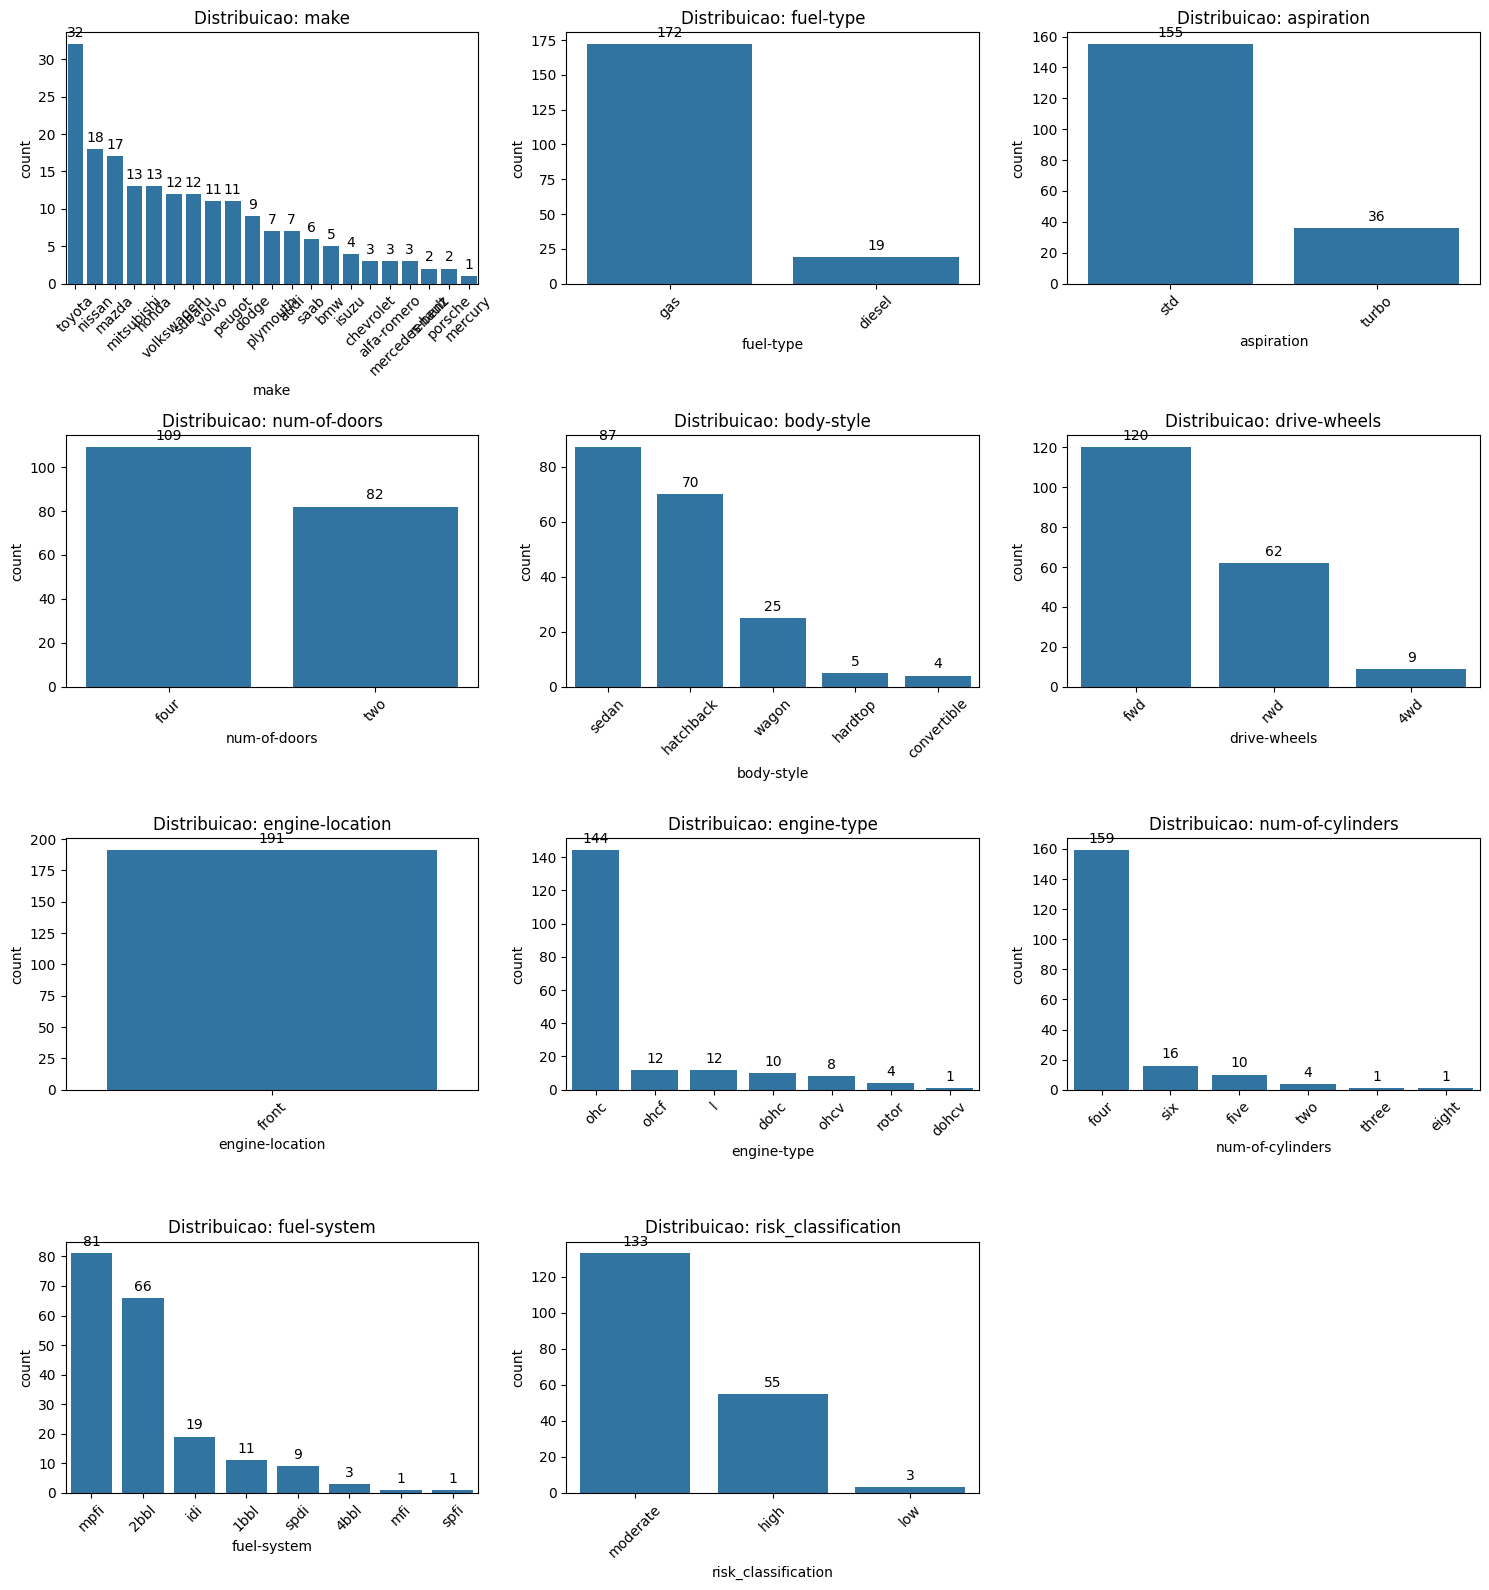

In [268]:
# Distribuição de frequência Absoluta

n = len(categorical_features_list)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(categorical_features_list):
    ax=axes[i]
    counts = df[col].value_counts()
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i] )
    axes[i].set_title(f'Distribuicao: {col}')
    axes[i].tick_params(axis='x', rotation=45)

        # Adiciona labels nas barras
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
fig.savefig('../reports/figures/eda_hist_categorical')

In [ ]:
# Distribuição de Frequência Normalizada por Fabricante
for col in categorical_features_list:
    print(df[col].value_counts(normalize=True)*100)

In [ ]:
# 4. Preço médio por categoria (tabela)
for col in categorical_features_list:
    mean_price = df.groupby(col)['price'].mean().sort_values(ascending=False).round(2)
    print(f'\nPreço médio por {col}:\n{mean_price}')

In [ ]:
# Distribuição dos Preços por Categoria - Boxplot
if 'price' in df.columns:
    n = len(categorical_features_list)
    cols = 2
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4))
    axes = axes.flatten()

    for i, col in enumerate(categorical_features_list):
        sns.boxplot(data=df, x=col, y='price', order=df[col].value_counts().index, ax=axes[i])
        axes[i].set_title(f'Preço por Categoria - {col}')
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    fig.savefig('../reports/figures/eda_boxplot_categorical')


In [376]:
# "O tipo de carroceria influencia significativamente o preço do carro?"

from scipy.stats import kruskal

# Separando os preços por grupo
groups = [group['price'].values for name, group in df.groupby('body-style')]

# Aplicando o teste
stat, p = kruskal(*groups)

print(f"Kruskal-Wallis H = {stat:.2f}, p-value = {p:.4f}")

# Se p < 0.05: Existe diferença estatística entre as medianas de pelo menos um grupo.
# Se p >= 0.05: Rejeita H0 - Não há evidência suficiente para afirmar que as medianas são diferentes.

Kruskal-Wallis H = 13.79, p-value = 0.0080


In [381]:
# 6. Cramér's V para ver correlação entre variáveis categóricas
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Exemplo de Cramér's V entre duas variáveis categóricas
print(cramers_v(df['body-style'], df['engine-size']))

0.3239880790205356
